# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
type_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
type_avg_fare = type_fare_count / type_ride_count
type_avg_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
type_avg_driver_fare = type_fare_count / type_driver_count
type_avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total_Rides": type_ride_count,
    "Total Drivers": type_driver_count,
    "Total Fares": type_fare_count,
    "Average Fare Per Ride": type_avg_fare,
    "Average Fare Per Driver": type_avg_driver_fare})
pyber_summary_df

,Total_Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Ride"] = pyber_summary_df["Average Fare Per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare Per Driver"] = pyber_summary_df["Average Fare Per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total_Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df = pyber_data_df.rename(columns =
                                    {"city": "City",
                                     "date": "Date",
                                     "fare": "Fare",
                                     "ride_id": "Ride ID",
                                     "driver_count": "Driver Count",
                                     "type": "City Type"})
pyber_data_df.head()

,City,Date,Fare,Ride ID,Driver Count,City Type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = pyber_data_df.groupby(["City Type", "Date"]).sum()[["Fare"]]
sum_fares_df

Fare
City Type Date                
Rural     1/1/19 9:45    43.69
          1/11/19 4:39   16.42
          1/14/19 15:58  54.10
          1/14/19 7:09   18.05
          1/15/19 21:44  30.26
...                        ...
Urban     5/8/19 1:54    32.69
          5/8/19 2:31    41.33
          5/8/19 4:20    21.99
          5/8/19 4:39    18.45
          5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_df = sum_fares_df.reset_index()
sum_fares_df.head()

,City Type,Date,Fare
0,Rural,1/1/19 9:45,43.69
1,Rural,1/11/19 4:39,16.42
2,Rural,1/14/19 15:58,54.10
3,Rural,1/14/19 7:09,18.05
4,Rural,1/15/19 21:44,30.26


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_df_pivot = sum_fares_df.pivot(index = "Date", columns = "City Type", values = "Fare")
sum_fares_df_pivot.head()


City Type,Rural,Suburban,Urban
Date,,,
1/1/19 0:08,NaN,NaN,37.91
1/1/19 0:46,NaN,47.74,NaN
1/1/19 12:32,NaN,25.56,NaN
1/1/19 14:40,NaN,NaN,5.42
1/1/19 14:42,NaN,NaN,12.31


In [15]:
# Create a datetime Index (needed because step 5 would not work for me and had BCS assit me)
sum_fares_df_pivot.index = pd.to_datetime(sum_fares_df_pivot.index).date
sum_fares_df_pivot.index = pd.to_datetime(sum_fares_df_pivot.index)
sum_fares_df_pivot.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01',
               ...
               '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-08',
               '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08',
               '2019-05-08', '2019-05-08'],
              dtype='datetime64[ns]', length=2361, freq=None)

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_dates_df = sum_fares_df_pivot.loc["01-01-2019":"04-29-2019"]
fare_dates_df

City Type,Rural,Suburban,Urban
2019-01-01,NaN,NaN,37.91
2019-01-01,NaN,47.74,NaN
2019-01-01,NaN,25.56,NaN
2019-01-01,NaN,NaN,5.42
2019-01-01,NaN,NaN,12.31
...,...,...,...
2019-04-09,NaN,NaN,24.99
2019-04-09,NaN,NaN,15.96
2019-04-09,NaN,NaN,39.36
2019-04-09,NaN,NaN,4.95


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# Create a datetime Index
sum_fares_df_pivot.index = pd.to_datetime(sum_fares_df_pivot.index).date
sum_fares_df_pivot.index = pd.to_datetime(sum_fares_df_pivot.index)
sum_fares_df_pivot.index

sum_fares_df_pivot.head()

City Type,Rural,Suburban,Urban
2019-01-01,NaN,NaN,37.91
2019-01-01,NaN,47.74,NaN
2019-01-01,NaN,25.56,NaN
2019-01-01,NaN,NaN,5.42
2019-01-01,NaN,NaN,12.31


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
sum_fares_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 to 2019-05-08
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
sum_city_fares = sum_fares_df_pivot.resample('W').sum()
sum_city_fares

City Type,Rural,Suburban,Urban
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20
2019-03-10,303.94,925.27,2470.93


<AxesSubplot:>

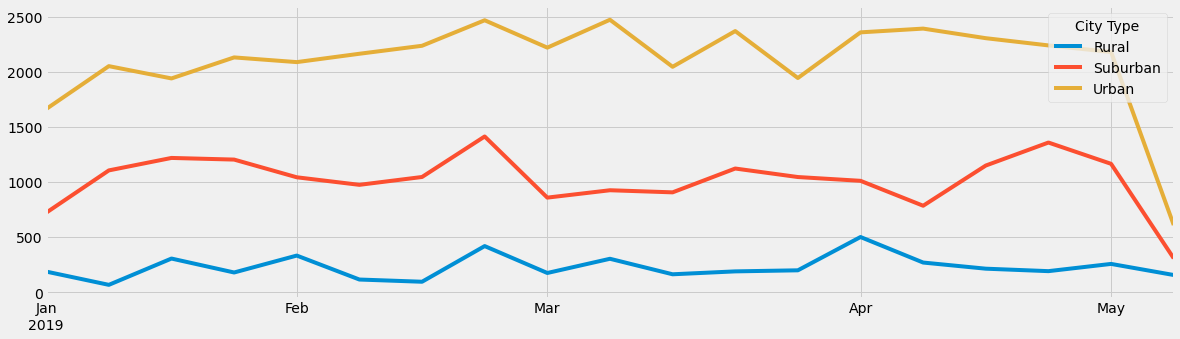

In [26]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.x_axis = ('Month')
plt.y_avis = ('Fare ($USD)')
plt.title = ('Total Fare by City Type')
sum_city_fares.plot(figsize = (18,5),)
#plt.savefig('Resources/Pyber_Challenge_Starter_Code.png')
